Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
from google.colab import drive
drive.mount('/content/drive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/MLandAI/Test/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/MLandAI/Test/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset= "validation",
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

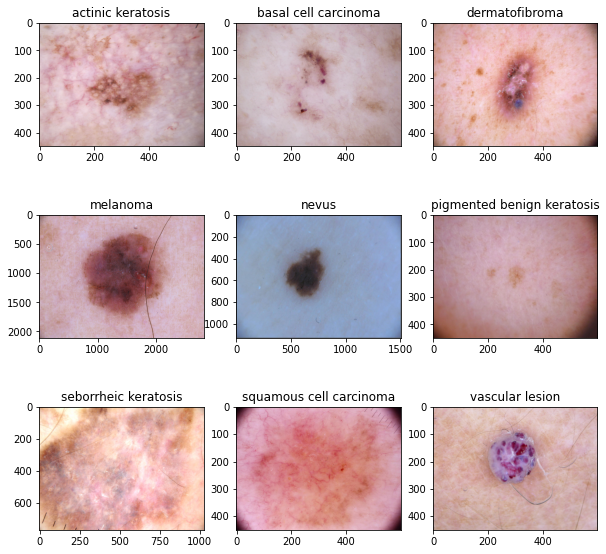

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))                   
])
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(180,180,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 86, 86, 64)       256       
 hNormalization)                                      

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 86, 86, 64)       256       
 hNormalization)                                      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 127ms/step - loss: -72374.1406 - accuracy: 0.1702 - val_loss: -75136.7891 - val_accuracy: 0.1544
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: -839093.8125 - accuracy: 0.1741 - val_loss: -886399.0000 - val_accuracy: 0.1544
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: -3154342.0000 - accuracy: 0.1741 - val_loss: -2941823.5000 - val_accuracy: 0.1544
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: -7856294.5000 - accuracy: 0.1741 - val_loss: -8362500.5000 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: -15479763.0000 - accuracy: 0.1741 - val_loss: -17258346.0000 - val_accuracy: 0.1544
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: -27067840.0000 - accuracy: 0.1741 - val_loss: -34434684.0000 - val_accuracy: 0.1544
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - los

### Visualizing training results

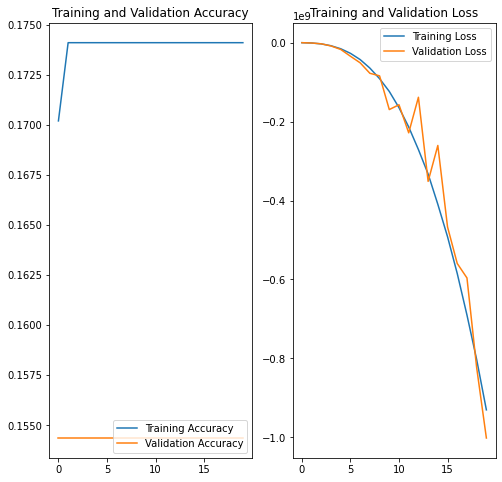

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Checking model overfit or underfit
loss, accuracy =  model.evaluate(train_ds, verbose=1)
loss_v , accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ",accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 15ms/step - loss: -1001764096.0000 - accuracy: 0.1544
Accuracy:  0.1741071492433548
Validation Accuracy:  0.15436241030693054
Loss:  -982250432.0
Validation Loss -1001764096.0


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

There are chances of model to be overfitting but its too early to comment out on the overfitting or underfitting

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                            layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                            layers.experimental.preprocessing.RandomZoom(height_factor=(0.2,0.3), width_factor=(0.2,0.3),fill_mode='reflect')
])

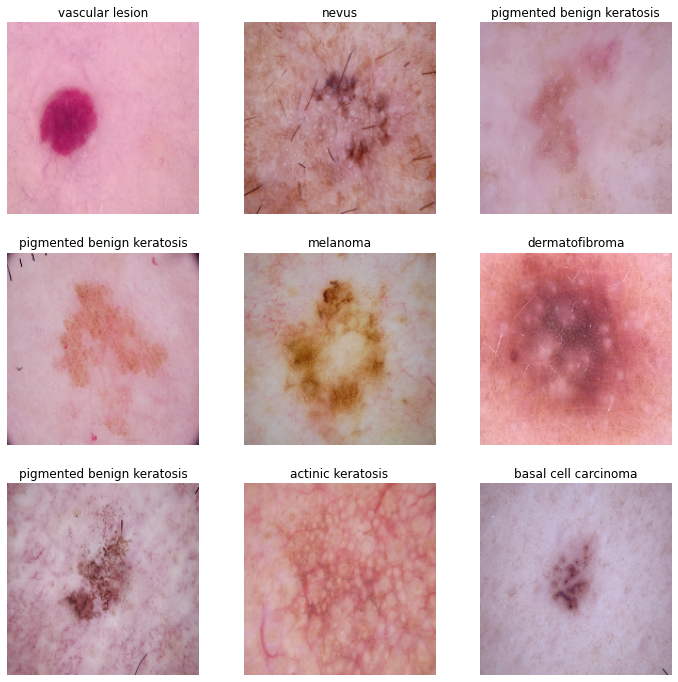

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(data_augument(images)[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPool2D
num_classes = 9
model = Sequential([data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu',input_shape=(180,180,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
    

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 8s 94ms/step - loss: 2.0433 - accuracy: 0.2020 - val_loss: 2.1206 - val_accuracy: 0.2327
Epoch 2/20
56/56 [==============================] - 5s 85ms/step - loss: 1.9722 - accuracy: 0.2478 - val_loss: 1.7486 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 5s 84ms/step - loss: 1.7249 - accuracy: 0.3566 - val_loss: 1.6129 - val_accuracy: 0.4027
Epoch 4/20
56/56 [==============================] - 5s 84ms/step - loss: 1.6167 - accuracy: 0.4174 - val_loss: 1.5750 - val_accuracy: 0.4049
Epoch 5/20
56/56 [==============================] - 5s 84ms/step - loss: 1.6423 - accuracy: 0.4074 - val_loss: 1.5875 - val_accuracy: 0.3915
Epoch 6/20
56/56 [==============================] - 5s 84ms/step - loss: 1.5824 - accuracy: 0.4503 - val_loss: 1.5504 - val_accuracy: 0.4430
Epoch 7/20
56/56 [==============================] - 5s 84ms/step - loss: 1.5157 - accuracy: 0.4715 - val_loss: 1.5069 - val_accuracy: 0.4273
Epoch 8/20
56/56 [======

### Visualizing the results

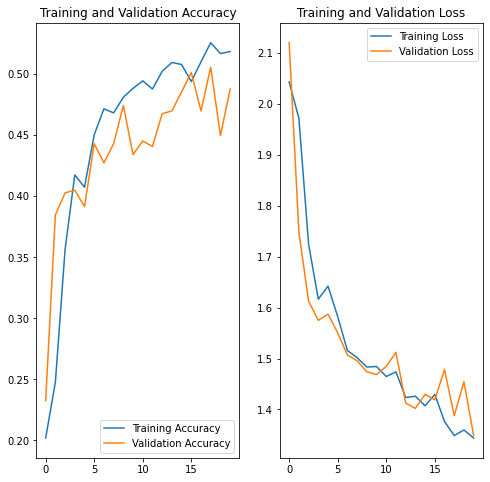

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy =  model.evaluate(train_ds, verbose=1)
loss_v , accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ",accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 28ms/step - loss: 1.3490 - accuracy: 0.4877
Accuracy:  0.5334821343421936
Validation Accuracy:  0.48769575357437134
Loss:  1.2920588254928589
Validation Loss 1.348982810974121


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is no improvement in accuracy but we can see that the problem of overfitting is reduced due to data augmentation


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
1,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
2,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
3,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
4,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2235,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2236,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2237,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
1,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
2,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
3,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
4,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2235,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2236,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion
2237,/content/drive/My Drive/MLandAI/Test/Train/vas...,vascular lesion


<BarContainer object of 9 artists>

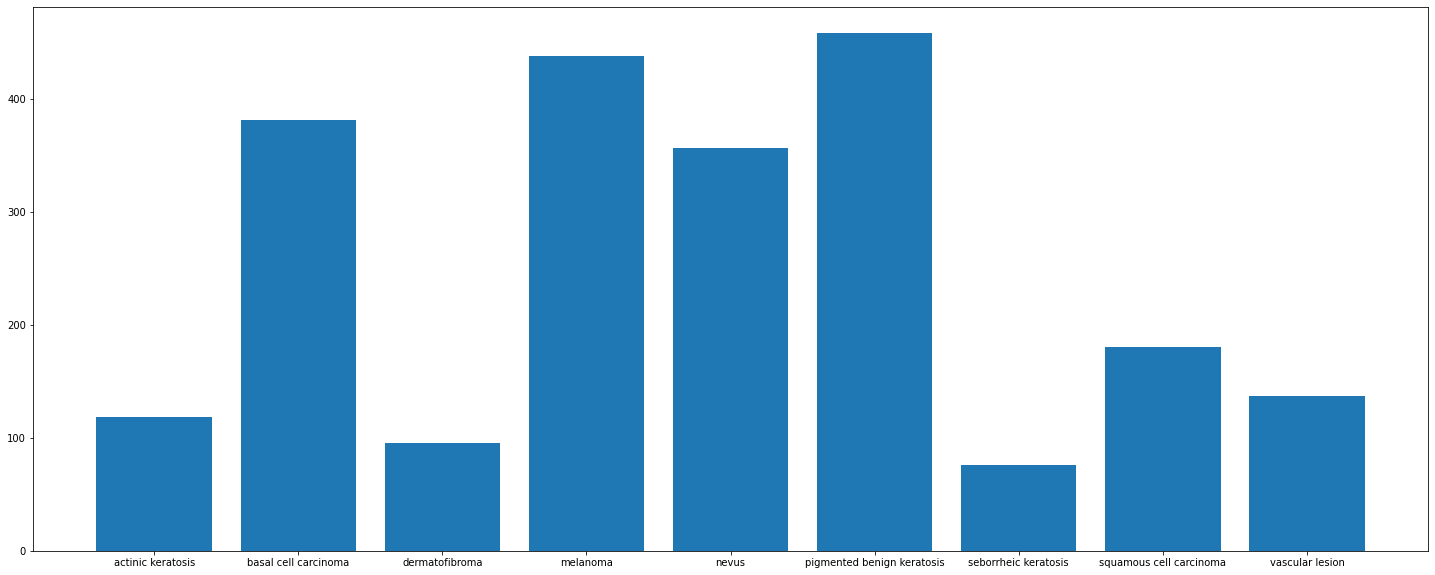

In [ ]:
count=[]
for i in class_names:
  count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Ans:1  seborrheic keratosis has least number of samples.
Ans:2  melanoma and pigmented benign keratosis have proportionate number of
samples

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
##path_to_training_dataset="/content/drive/My Drive/MLandAI/Test/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/My Drive/MLandAI/Test/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F83EE46BC50>: 100%|██████████| 500/500 [00:52<00:00,  9.52 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F848B890650>: 100%|██████████| 500/500 [00:36<00:00, 13.70 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8452043E90>: 100%|██████████| 500/500 [00:41<00:00, 12.13 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F848BC4B7D0>: 100%|██████████| 500/500 [00:39<00:00, 12.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84AD373F90>: 100%|██████████| 500/500 [00:44<00:00, 11.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84ADB71550>: 100%|██████████| 500/500 [00:39<00:00, 12.56 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1007x711 at 0x7F84AD5A1B50>: 100%|██████████| 500/500 [00:41<00:00, 11.92 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F84ADAA32D0>: 100%|██████████| 500/500 [00:43<00:00, 11.56 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/MLandAI/Test/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F853F85FCD0>: 100%|██████████| 500/500 [00:49<00:00, 10.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train1 = pathlib.Path("/content/drive/My Drive/MLandAI/Test/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


In [ ]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
1,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
2,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
3,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
4,/content/drive/My Drive/MLandAI/Test/Train/act...,actinic keratosis
...,...,...
6734,/content/drive/My Drive/MLandAI/Test/Train/out...,vascular lesion
6735,/content/drive/My Drive/MLandAI/Test/Train/out...,vascular lesion
6736,/content/drive/My Drive/MLandAI/Test/Train/out...,vascular lesion
6737,/content/drive/My Drive/MLandAI/Test/Train/out...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1354
melanoma                      1326
basal cell carcinoma          1190
nevus                         1065
squamous cell carcinoma        543
vascular lesion                384
actinic keratosis              374
dermatofibroma                 280
seborrheic keratosis           223
Name: Label, dtype: int64

In [ ]:
from glob import glob

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1354
melanoma                      1326
basal cell carcinoma          1190
nevus                         1065
squamous cell carcinoma        543
vascular lesion                384
actinic keratosis              374
dermatofibroma                 280
seborrheic keratosis           223
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")
data_dir_train1=pathlib.Path("/content/drive/My Drive/MLandAI/Test/Train")

In [ ]:
data_dir_train1

PosixPath('/content/drive/My Drive/MLandAI/Test/Train')

#### **Todo:** Create a training dataset

In [ ]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [ ]:
data_dir_train="/content/drive/My Drive/MLandAI/Test/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 37s 210ms/step - loss: nan - accuracy: 0.0206 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/30
169/169 [==============================] - 33s 190ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/30
169/169 [==============================] - 33s 191ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/30
169/169 [==============================] - 33s 190ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/30
169/169 [==============================] - 33s 190ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/30
169/169 [==============================] - 37s 211ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/30
169/169 [==============================] - 33s 192ms/step - loss: nan - accuracy: 0.0161 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/30
169/169 [==================

#### **Todo:**  Visualize the model results

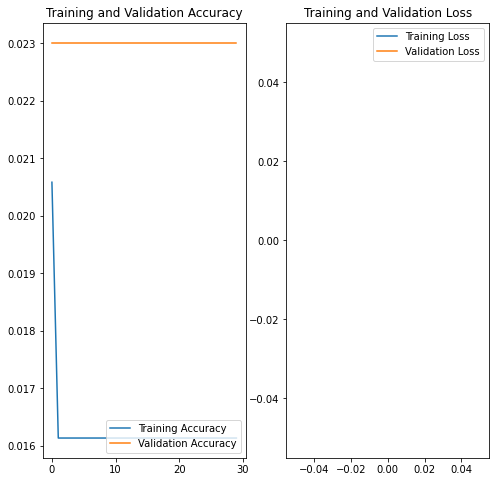

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?





*   The Class rebalance helped in reducing overfitting of the data and thus the loss is greatly reduced but it reduced the accuracy very low.

*   Initially the base model has a overfit at high ratio.


*   Due to introduction of BatchNormalization and Augumentation along with dropouts where ever it is necessary, reduced the overfitting criteria and helps for smooth carry forward.




